In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['Brown-Headed Barbet','Buffalo','butterfly','cat','Cattle Egret','chicken','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','deer','dog','elephant','Forest Wagtail','fox','gharial','Gray Wagtail','Green Bee-Eater','Hoopoe','horse','House Crow','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','Jungle Babbler','kangaroo','leopard','lion','Northern Lapwing','pangolin','Peacock','Python','Red-Wattled Lapwing','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','Sarus Crane','shark','sheep','spider','tiger','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:01<00:00, 545.61it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 61.96it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='elu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=300)

Epoch 1/300
456/456 [==============================] - 18s 23ms/step - loss: 3.2473 - accuracy: 0.1592
Epoch 2/300
456/456 [==============================] - 10s 23ms/step - loss: 2.4786 - accuracy: 0.3343
Epoch 3/300
456/456 [==============================] - 10s 23ms/step - loss: 2.1053 - accuracy: 0.4250
Epoch 4/300
456/456 [==============================] - 10s 23ms/step - loss: 1.8419 - accuracy: 0.4917
Epoch 5/300
456/456 [==============================] - 10s 23ms/step - loss: 1.6436 - accuracy: 0.5417
Epoch 6/300
456/456 [==============================] - 10s 23ms/step - loss: 1.4891 - accuracy: 0.5825
Epoch 7/300
456/456 [==============================] - 10s 23ms/step - loss: 1.3629 - accuracy: 0.6168
Epoch 8/300
456/456 [==============================] - 10s 23ms/step - loss: 1.2407 - accuracy: 0.6468
Epoch 9/300
456/456 [==============================] - 10s 23ms/step - loss: 1.1442 - accuracy: 0.6758
Epoch 10/300
456/456 [==============================] - 10s 23ms/step - l

456/456 [==============================] - 10s 23ms/step - loss: 0.3787 - accuracy: 0.9108
Epoch 80/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3918 - accuracy: 0.9079
Epoch 81/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3950 - accuracy: 0.9059
Epoch 82/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3849 - accuracy: 0.9104
Epoch 83/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3950 - accuracy: 0.9083
Epoch 84/300
456/456 [==============================] - 10s 23ms/step - loss: 0.4075 - accuracy: 0.9053
Epoch 85/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3781 - accuracy: 0.9093
Epoch 86/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3898 - accuracy: 0.9101
Epoch 87/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3851 - accuracy: 0.9108
Epoch 88/300
456/456 [==============================] - 10s 23ms/step - loss:

456/456 [==============================] - 10s 23ms/step - loss: 0.3394 - accuracy: 0.9298
Epoch 158/300
456/456 [==============================] - 10s 23ms/step - loss: 0.4069 - accuracy: 0.9173
Epoch 159/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3626 - accuracy: 0.9236
Epoch 160/300
456/456 [==============================] - 10s 23ms/step - loss: 0.5371 - accuracy: 0.8934
Epoch 161/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3104 - accuracy: 0.9351
Epoch 162/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3672 - accuracy: 0.9259
Epoch 163/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3109 - accuracy: 0.9342
Epoch 164/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3629 - accuracy: 0.9270
Epoch 165/300
456/456 [==============================] - 10s 23ms/step - loss: 0.3230 - accuracy: 0.9330
Epoch 166/300
456/456 [==============================] - 10s 23ms/ste

456/456 [==============================] - 10s 23ms/step - loss: 3.6073 - accuracy: 0.0975
Epoch 236/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6074 - accuracy: 0.0975
Epoch 237/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6069 - accuracy: 0.0975
Epoch 238/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6087 - accuracy: 0.0975
Epoch 239/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6069 - accuracy: 0.0975
Epoch 240/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6069 - accuracy: 0.0975
Epoch 241/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6080 - accuracy: 0.0975
Epoch 242/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6091 - accuracy: 0.0975
Epoch 243/300
456/456 [==============================] - 10s 23ms/step - loss: 3.6069 - accuracy: 0.0975
Epoch 244/300
456/456 [==============================] - 10s 23ms/ste

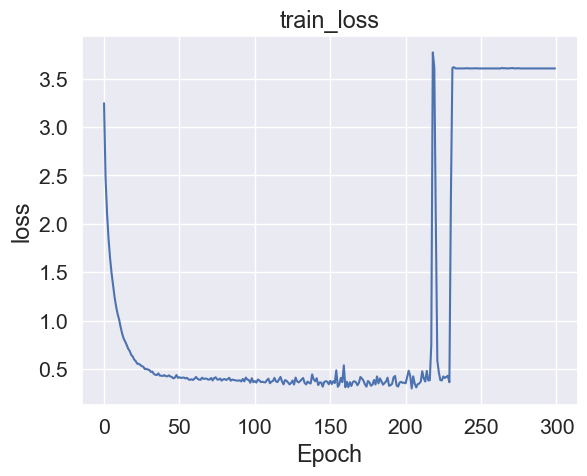

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 1s 7ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.05181347150259067


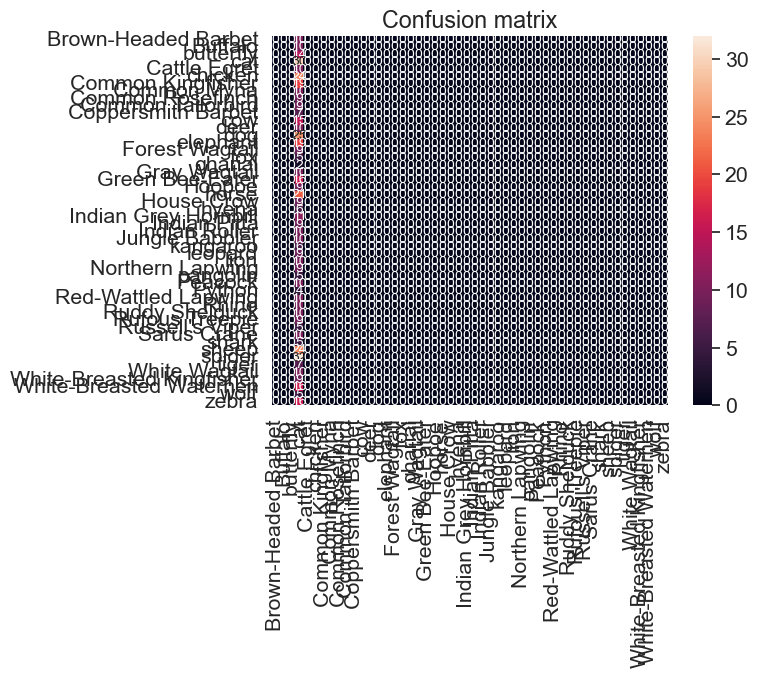

In [12]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [13]:
'存模型&讀模型'
from keras.models import load_model
model.save("problem_model")

INFO:tensorflow:Assets written to: problem_model\assets


INFO:tensorflow:Assets written to: problem_model\assets
